In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gmm import GMM

sns.set_style("whitegrid")

In [2]:
df_penguins = pd.read_csv("penguins_size.csv")

In [3]:
numeric_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
df_penguins = df_penguins.dropna(subset=numeric_cols)

In [11]:
def calc_log_likelihood(data, wgt, mu, sigma, gmm_obj):
    ll_sum = 0.0
    if data.ndim == 1:
        data = data.reshape(-1, 1)
    for x in data:
        p = gmm_obj.pdf(x, wgt, mu, sigma)  # returns a float
        ll_sum += np.log(p)
    return ll_sum

def calc_aic(data, wgt, mu, sigma, gmm_obj):
    K = len(wgt)
    d = mu.shape[1]
    num_params = K*d + K*(d*(d+1)/2) + (K - 1)

    llh = calc_log_likelihood(data, wgt, mu, sigma, gmm_obj)
    aic_val = 2.0 * num_params - 2.0 * llh
    return aic_val

In [12]:
def fit_best_gmm_univariate(data_1d, K_min=1, K_max=5):
    data_reshaped = data_1d.reshape(-1, 1)

    gmm_obj = GMM()
    best_aic = None
    best_k = None
    best_params = None

    for k in range(K_min, K_max+1):
        wgt, mu, sigma = gmm_obj.fit(data_reshaped, K=k)
        aic_val = calc_aic(data_reshaped, wgt, mu, sigma, gmm_obj)
        if best_aic is None or aic_val < best_aic:
            best_aic = aic_val
            best_k = k
            best_params = (wgt, mu, sigma)

    return best_k, best_params

In [13]:
def plot_univariate_gmm(data_1d, wgt, mu, sigma, gmm_obj, ax_pdf, ax_cdf, ax_hist, bins=30):
    x_min, x_max = np.min(data_1d), np.max(data_1d)
    margin = 0.05*(x_max - x_min)
    x_vals = np.linspace(x_min - margin, x_max + margin, 300)
    pdf_vals = []
    cdf_vals = []

    for x in x_vals:
        x_reshaped = np.array([x]).reshape(1, 1)  # shape (1,1)
        pdf_vals.append(gmm_obj.pdf(x_reshaped, wgt, mu, sigma))
        cdf_vals.append(gmm_obj.cdf(x_reshaped, wgt, mu, sigma))

    pdf_vals = np.array(pdf_vals)
    cdf_vals = np.array(cdf_vals)

    ax_pdf.plot(x_vals, pdf_vals, color="blue", label="GMM PDF")
    ax_pdf.set_title("Univariate GMM PDF")
    ax_pdf.legend()

    ax_cdf.plot(x_vals, cdf_vals, color="green", label="GMM CDF")
    ax_cdf.set_title("Univariate GMM CDF")
    ax_cdf.legend()

    ax_hist.hist(data_1d, bins=bins, density=True, alpha=0.5, label="Original data")

    sim_count = len(data_1d)
    sim_data = gmm_obj.rvs(wgt, mu, sigma, size=sim_count)
    sim_data_1d = sim_data.reshape(-1)

    ax_hist.hist(sim_data_1d, bins=bins, density=True, alpha=0.5, label="Simulated data")
    ax_hist.set_title("Hist: Original vs. Simulated")
    ax_hist.legend()


Column: culmen_length_mm
  Best K = 4
  Weights = [0.14479071 0.26464531 0.35698934 0.23357465]
  Means = [45.93157716 41.23343534 49.64287205 36.97855559]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 0.646
    Component 1 -> sigma^2 = 3.457
    Component 2 -> sigma^2 = 7.062
    Component 3 -> sigma^2 = 3.203


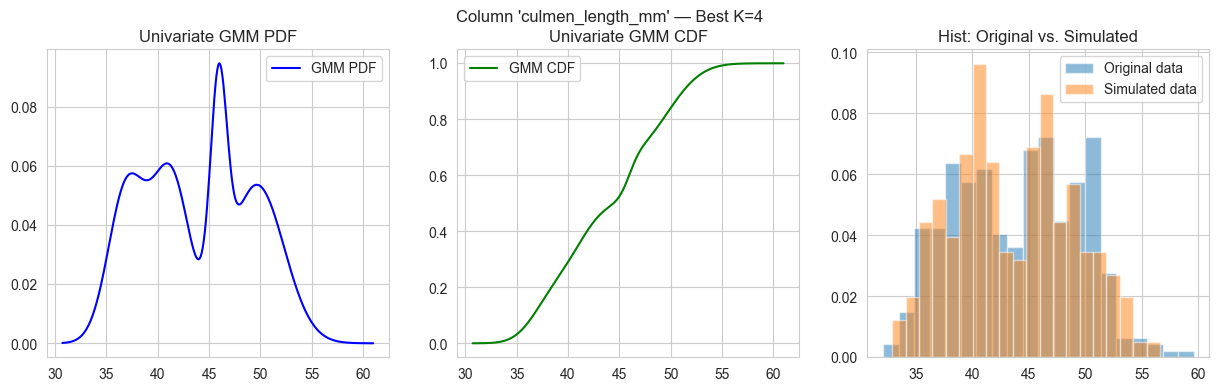


Column: culmen_depth_mm
  Best K = 2
  Weights = [0.64193042 0.35806958]
  Means = [18.346755   15.00777988]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 1.494
    Component 1 -> sigma^2 = 1.025


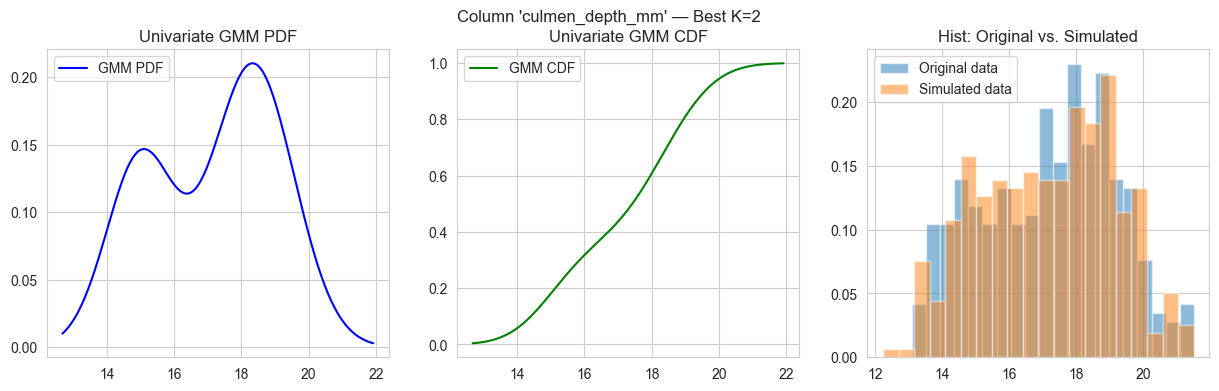


Column: flipper_length_mm
  Best K = 2
  Weights = [0.60567986 0.39432014]
  Means = [191.00452311 216.13811507]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 43.028
    Component 1 -> sigma^2 = 51.286


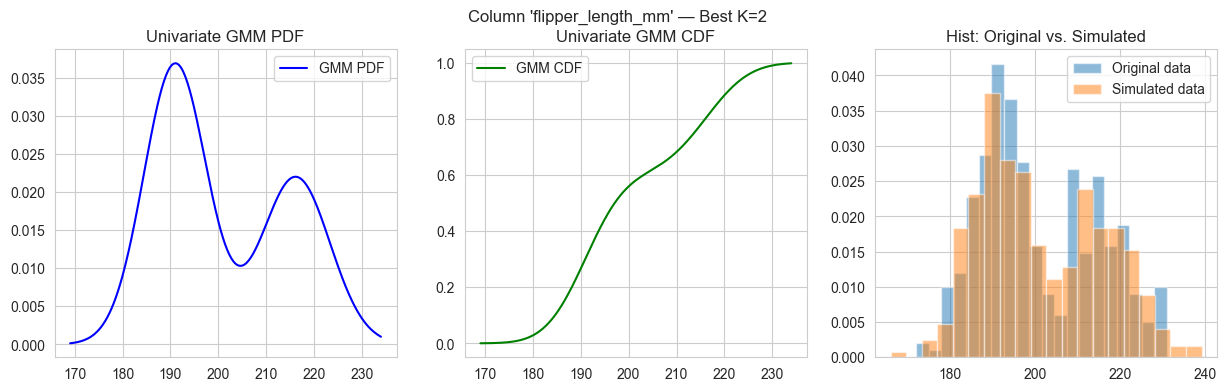


Column: body_mass_g
  Best K = 3
  Weights = [0.51984809 0.17197292 0.30817899]
  Means = [3575.26194644 5484.15121941 4542.93071353]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 117219.260
    Component 1 -> sigma^2 = 104690.992
    Component 2 -> sigma^2 = 128447.031


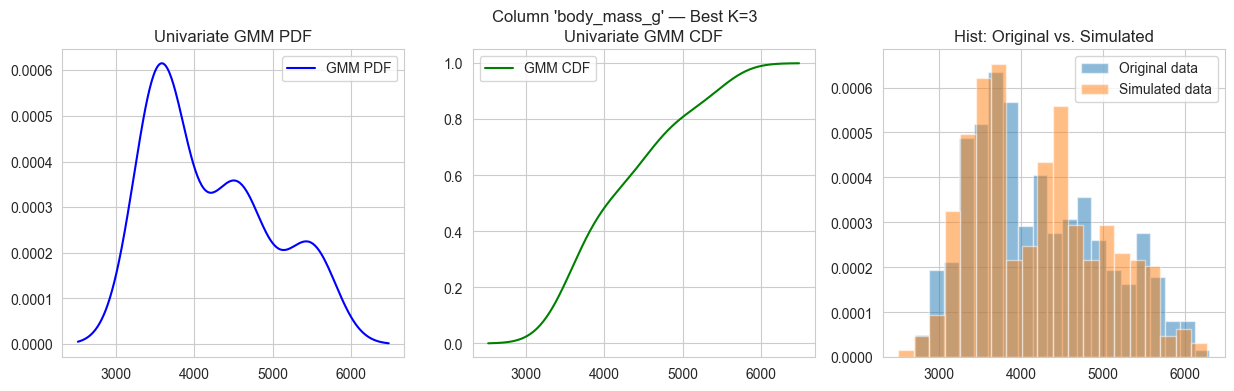

In [15]:
for col in numeric_cols:
    data_col = df_penguins[col].values  # shape (N,)

    best_k, (wgt, mu, sigma) = fit_best_gmm_univariate(data_col, K_min=1, K_max=5)

    print(f"\nColumn: {col}")
    print(f"  Best K = {best_k}")
    print(f"  Weights = {wgt}")
    print(f"  Means = {mu.ravel()}")
    print("  Covariances (for 1D, each is 1x1):")
    for i, cov_i in enumerate(sigma):
        print(f"    Component {i} -> sigma^2 = {cov_i[0,0]:.3f}")

    fig, (ax_pdf, ax_cdf, ax_hist) = plt.subplots(ncols=3, figsize=(15,4))
    gmm_obj = GMM()  # just an instance to pass to plot
    plot_univariate_gmm(data_col, wgt, mu, sigma, gmm_obj, ax_pdf, ax_cdf, ax_hist, bins=20)
    fig.suptitle(f"Column '{col}' — Best K={best_k}")
    plt.show()

In [17]:
# COMBO-17 Galaxy Dataset
df_galaxies = pd.read_csv("COMBO17.csv")

In [18]:
numeric_cols = ["Rmag", "ApDRmag", "Mcz", "UjMAG"]
df_galaxies = df_galaxies.dropna(subset=numeric_cols)


Column: Rmag
  Best K = 5
  Weights = [0.27660094 0.25657416 0.07306305 0.22974254 0.16401932]
  Means = [23.57449501 24.60815248 21.1141486  25.58255498 22.46477544]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 0.201
    Component 1 -> sigma^2 = 0.172
    Component 2 -> sigma^2 = 1.881
    Component 3 -> sigma^2 = 0.178
    Component 4 -> sigma^2 = 0.436


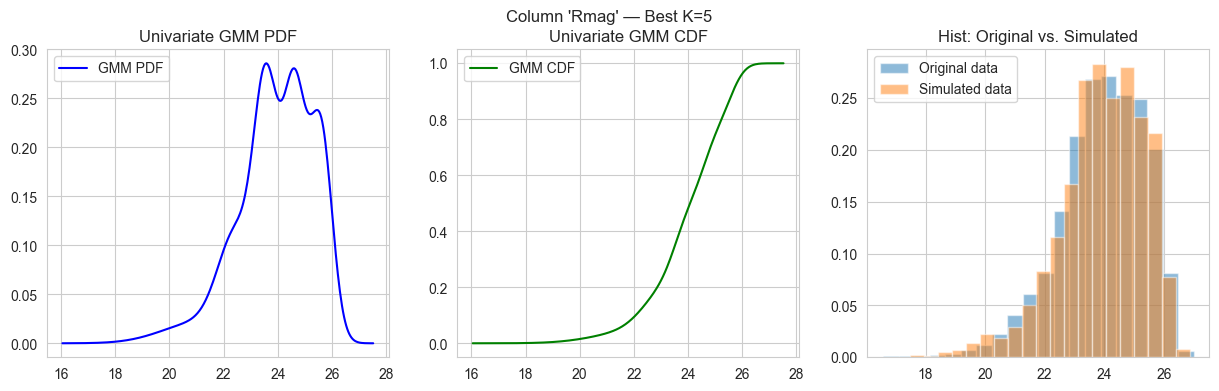


Column: ApDRmag
  Best K = 5
  Weights = [0.1416755  0.29719603 0.370965   0.03631575 0.15384771]
  Means = [-0.73689323 -0.34318042  0.00157374 -1.14257402  0.36630151]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 0.067
    Component 1 -> sigma^2 = 0.028
    Component 2 -> sigma^2 = 0.022
    Component 3 -> sigma^2 = 0.795
    Component 4 -> sigma^2 = 0.044


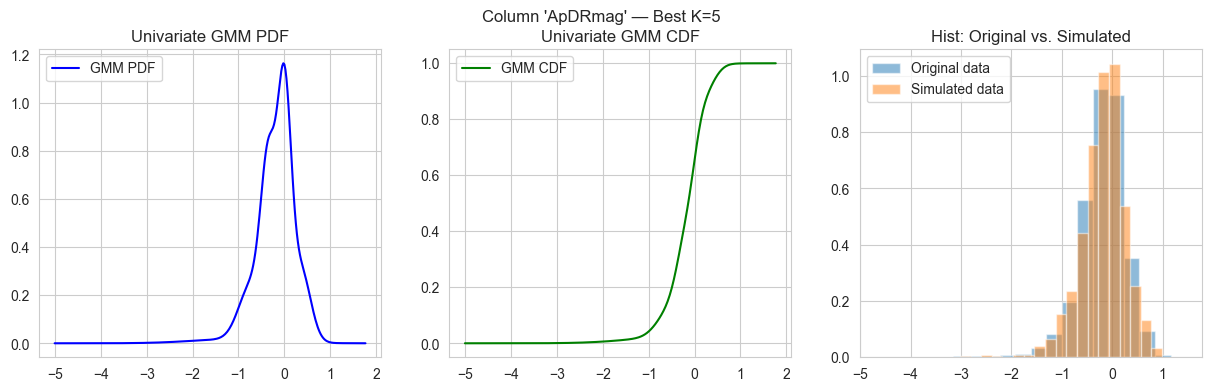


Column: Mcz
  Best K = 5
  Weights = [0.28080008 0.13060984 0.18180258 0.26167853 0.14510897]
  Means = [0.97227043 0.41835544 1.03169828 0.72828541 0.15647662]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 0.004
    Component 1 -> sigma^2 = 0.015
    Component 2 -> sigma^2 = 0.016
    Component 3 -> sigma^2 = 0.007
    Component 4 -> sigma^2 = 0.003


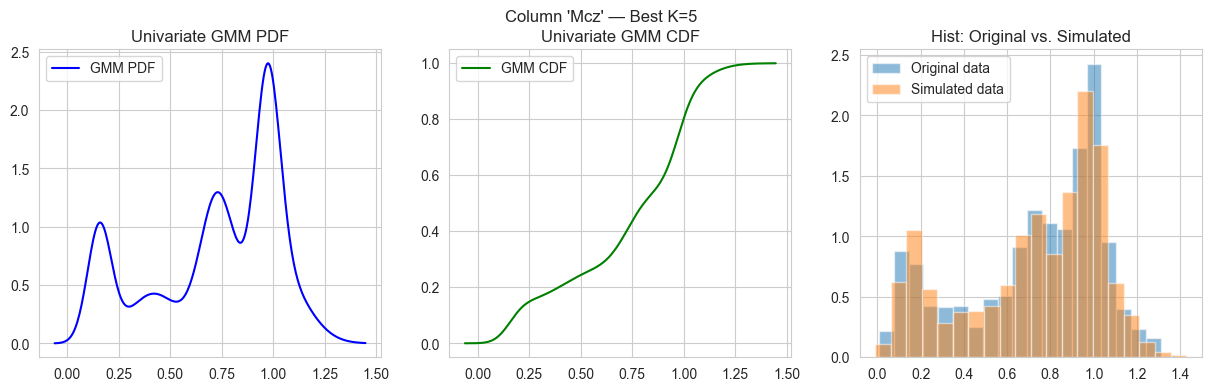


Column: UjMAG
  Best K = 3
  Weights = [0.43868626 0.14935136 0.41196238]
  Means = [-17.84278497 -14.18095264 -19.22669746]
  Covariances (for 1D, each is 1x1):
    Component 0 -> sigma^2 = 0.579
    Component 1 -> sigma^2 = 3.099
    Component 2 -> sigma^2 = 0.859


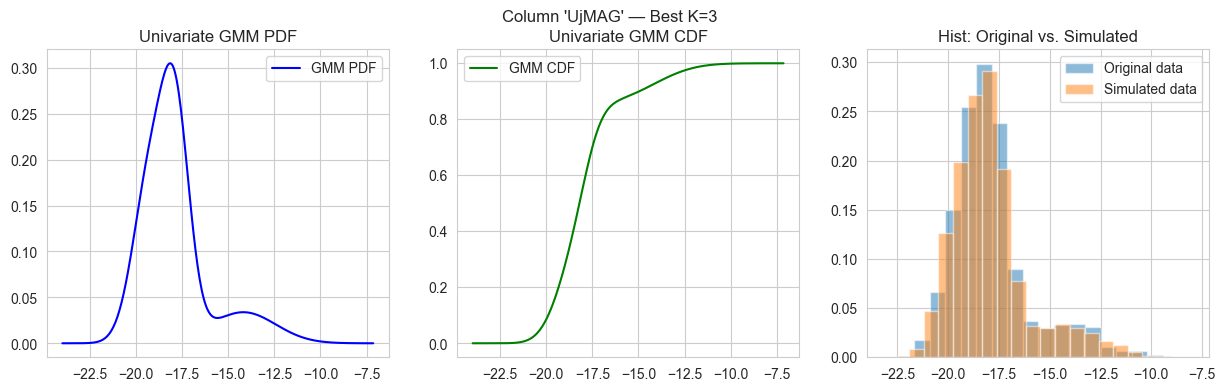

In [19]:
for col in numeric_cols:
    data_col = df_galaxies[col].values  # shape (N,)

    best_k, (wgt, mu, sigma) = fit_best_gmm_univariate(data_col, K_min=1, K_max=5)

    print(f"\nColumn: {col}")
    print(f"  Best K = {best_k}")
    print(f"  Weights = {wgt}")
    print(f"  Means = {mu.ravel()}")
    print("  Covariances (for 1D, each is 1x1):")
    for i, cov_i in enumerate(sigma):
        print(f"    Component {i} -> sigma^2 = {cov_i[0,0]:.3f}")

    fig, (ax_pdf, ax_cdf, ax_hist) = plt.subplots(ncols=3, figsize=(15,4))
    gmm_obj = GMM()  # just an instance to pass to plot
    plot_univariate_gmm(data_col, wgt, mu, sigma, gmm_obj, ax_pdf, ax_cdf, ax_hist, bins=20)
    fig.suptitle(f"Column '{col}' — Best K={best_k}")
    plt.show()